##### our challenge is to predict the final grade that a student will score. 
##### dataset source : https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [2]:
# numeric and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# preprocessing
from sklearn.model_selection import train_test_split

# models
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

# metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score


##### features are provided as two file, one for math and other for portugese subject.
##### lets combine the two data and remove duplicate enteries(i.e., we got the data of the same student for his
##### math and portugese grade) to form our dataset.

In [3]:
math_data = pd.read_csv('data/student/student-mat.csv', sep=';')

In [4]:
math_data.shape

(395, 33)

In [5]:
math_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
math_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [7]:
portugese_data = pd.read_csv('data/student/student-por.csv', sep=';')

In [8]:
portugese_data.shape

(649, 33)

In [9]:
portugese_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [10]:
data = pd.concat([math_data, portugese_data])

In [11]:
data.shape

(1044, 33)

In [12]:
data.drop_duplicates(subset=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob",
                             "Fjob","reason","nursery","internet"], inplace=True)

In [13]:
data.shape

(662, 33)

In [14]:
# now let us study some aggregations of our dataset
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,16.812689,2.492447,2.293051,1.564955,1.927492,0.332326,3.938066,3.184290,3.172205,1.504532,2.282477,3.531722,4.930514,10.728097,10.708459,10.725076
std,1.269194,1.130958,1.094027,0.742799,0.827405,0.716024,0.941930,1.060583,1.161907,0.926567,1.290121,1.434835,6.858060,3.082098,3.529588,4.106738
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,8.000000,9.000000,9.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,10.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


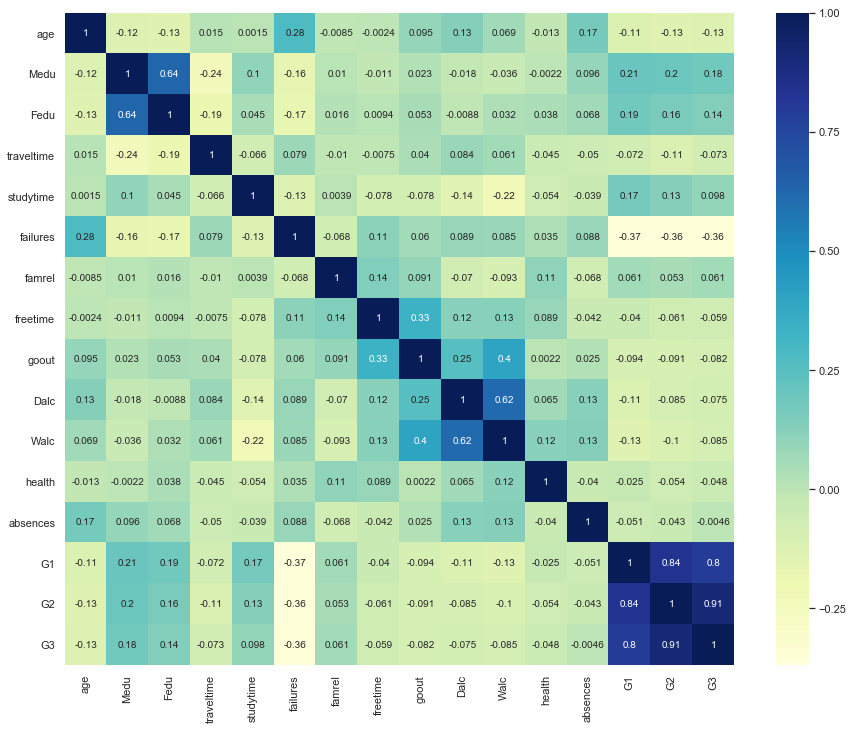

In [15]:
# lets visualize the correlation our data

plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

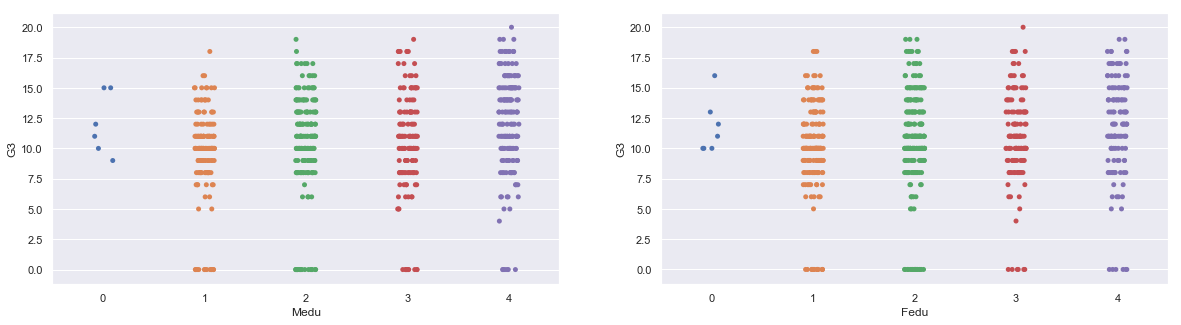

In [16]:
# let us visualize the correlation of the grade column with the following features,
#  Medu, Fedu, traveltime, studytime, goout, Dalc, Walc, health , G1, G2. we visualize this as it has a higher correlation
# score and moreover it makes sense that these features affect the grade of the student.

# here the plt.subplot will create plots with 1 row and 2 cols.
# the sns.catplot() will create a new FacetGrid instance which will inturn create a new plot
# but as we make the catplot() to plot on axes created by suplots(), the newly created plot of catplot() will be empty
# to ommit these empty plots we can close them using plt.close()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

medu_plot = sns.catplot('Medu', 'G3', data=data, ax=axes[0])

fedu_plot = sns.catplot('Fedu', 'G3', data=data, ax=axes[1])

plt.close()
plt.close()



In [17]:
# it seems obvious that as the education qualification of mother and father is more, the student will be able to 
# get help on subject doubts and will eventually be able to score high grade.

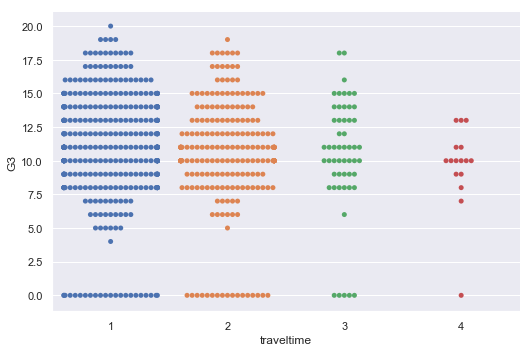

In [18]:
sns.catplot('traveltime', 'G3', data=data, kind='swarm', aspect=1.5)

In [19]:
# the travel time does affects the grade of the student.As it can be seen from the plot that the student who spend
# less time on travel tend to score good grade

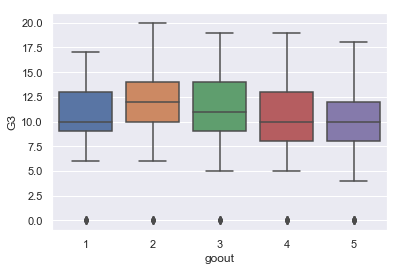

In [20]:

sns.boxplot('goout', 'G3', data=data)


In [21]:
# shows that student who go out to friends have better grades that who dont. it may be the outing provides the 
# refreshment and helps the student to concentrate more.

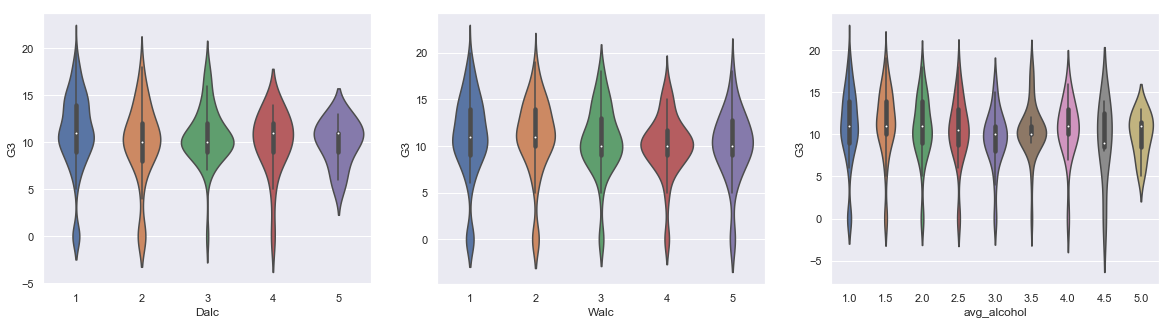

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

data['avg_alcohol'] = data[['Dalc', 'Walc']].mean(axis=1)

for i, col in enumerate(['Dalc', 'Walc', 'avg_alcohol']):
    sns.violinplot(x=col, y='G3', data=data, ax=axes[i])

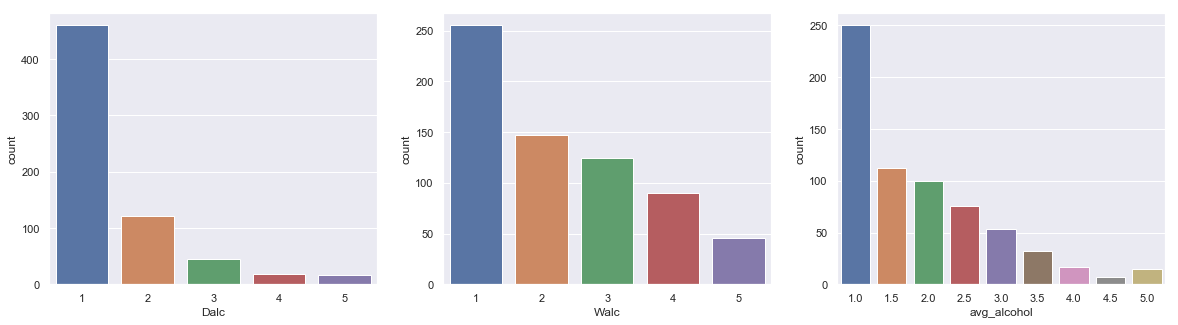

In [23]:
# let us look at the number of students corresponding to daily and weekly alcohol consumption

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
for i, col in enumerate(['Dalc', 'Walc', 'avg_alcohol']):
    sns.countplot(x=data[col], ax=axes[i])

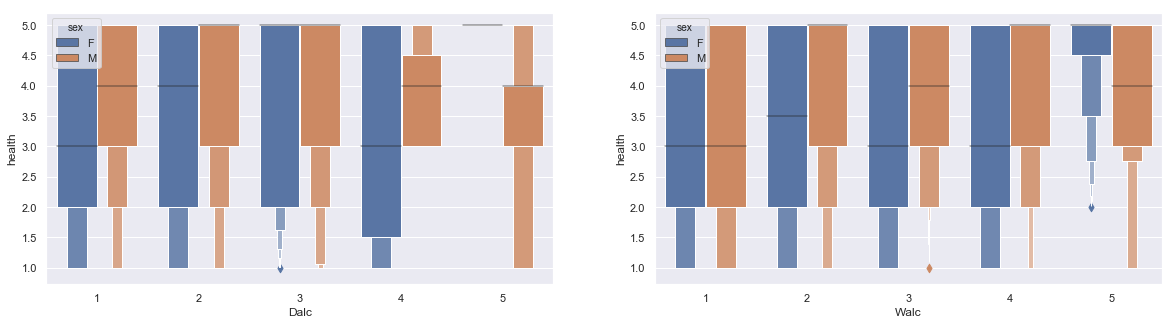

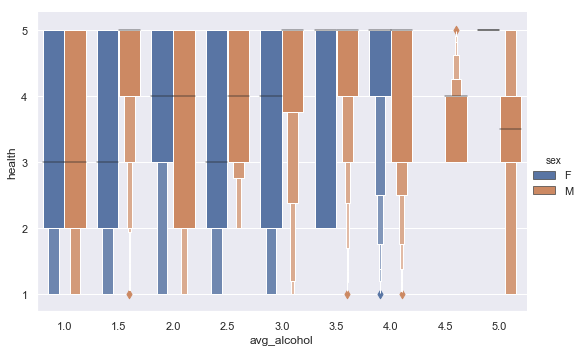

In [24]:
# let us also have a look at the impact of alcohol comsumption on health

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
for i, col in enumerate(['Dalc', 'Walc']):
    sns.catplot(x=col, y='health', hue='sex', data=data, kind='boxen', ax=axes[i])
    plt.close()

sns.catplot(x='avg_alcohol', y='health', hue='sex', data=data, kind='boxen', aspect=1.5)

In [25]:
# it seems that as the alcohol comsumption increases , female health is getting more affected.

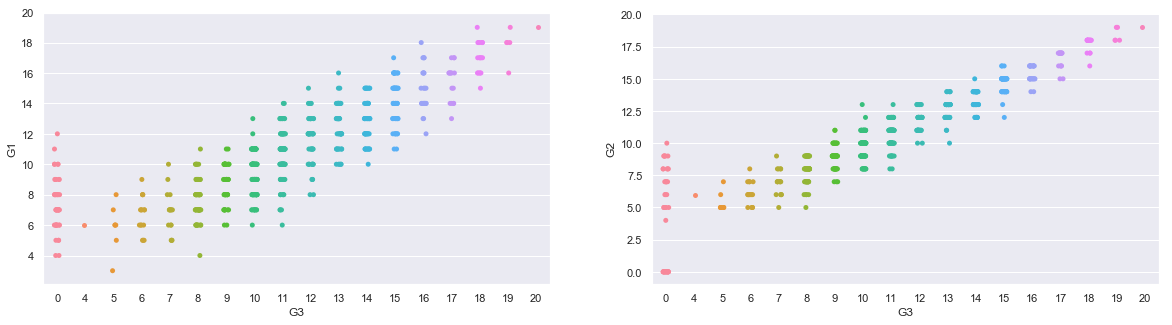

In [26]:
# lets finally consider the trend between the g1, g2 and the grade g3

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

for i, col in enumerate(['G1', 'G2']):
    sns.catplot('G3', col, data=data, ax=axes[i])
    plt.close()

In [27]:
data.drop('avg_alcohol', axis=1, inplace=True)

In [28]:
# now lets create the instance of different linear model and check how they perform on our data

def test_with_multiple_model(X, y):
    
    # split our data into test and train set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)
    
    print("checking Linear Regression model : ")
    print('--' * 15)
    lr = linear_model.LinearRegression()
    model = lr.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    evaluate(y_predict, y_test)
    
    print("___" * 10)
    print()
    
    print("checking ridge regression model : ")
    print('--' * 15)
    reg = linear_model.Ridge(alpha=0.5)
    model = reg.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    evaluate(y_predict, y_test)
    
    print("___" * 10)
    print()
    
    print('checking ridgeCV regression model : ')
    print('--' * 15)
    regCV = linear_model.RidgeCV(alphas=(0.03, 0.1, 0.3, 1.0, 3, 10, 30), cv=7)
    model = regCV.fit(X_train, y_train)
    print(f'optimal alpha is {model.alpha_}')
    y_predict = model.predict(X_test)
    evaluate(y_predict, y_test)
    
    print("___" * 10)
    print()
    
    print('checking Lasso regression model : ')
    print('--' * 15)
    las = linear_model.Lasso()
    model = las.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    evaluate(y_predict, y_test)
    
    print("___" * 10)
    print()
    
    print('checking LassoCV regression model : ')
    print('--' * 15)
    lasCV = linear_model.LassoCV(alphas=(0.03, 0.1, 0.3, 1.0, 3, 10, 30), cv=7)
    model = lasCV.fit(X_train, y_train)
    print(f'optimal alpha is {model.alpha_}')
    y_predict = model.predict(X_test)
    evaluate(y_predict, y_test)
    
    print('___' * 10)
    print()
    
    print('checking for DecisionTreeRegressor model : ')
    print('--' * 10)
    tree = DecisionTreeRegressor()
    model = tree.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    evaluate(y_predict, y_test)
    
    

In [29]:
def evaluate(y_predict, y_true):
    
    exp_var = explained_variance_score(y_predict, y_true)
    print(f'explained variance score is : {exp_var}')
    
    mean_abs = mean_absolute_error(y_predict, y_true)
    print(f'mean absolute error is : {mean_abs}')
    
    mean_sqrd = mean_squared_error(y_predict, y_true)
    print(f'mean squared error is : {mean_sqrd}')
    
#     mean_sqrd_log = mean_squared_log_error(y_predict, y_true)
#     print(f'mean squared log error is : {mean_sqrd_log}')
    
    r2 = r2_score(y_predict, y_true)
    print(f'r2 score is : {r2}')
    

In [30]:
processed_data = pd.get_dummies(data)
test_with_multiple_model(processed_data.drop('G3', axis=1), processed_data['G3'])

checking Linear Regression model : 
------------------------------
explained variance score is : 0.8191264246132121
mean absolute error is : 1.0662015757166354
mean squared error is : 2.6133378682504023
r2 score is : 0.8190652556607568
______________________________

checking ridge regression model : 
------------------------------
explained variance score is : 0.8192526080983286
mean absolute error is : 1.0653631781532094
mean squared error is : 2.6103838639133357
r2 score is : 0.8191891897450789
______________________________

checking ridgeCV regression model : 
------------------------------
optimal alpha is 30
explained variance score is : 0.8242549893309276
mean absolute error is : 1.037290002754264
mean squared error is : 2.4967314699835192
r2 score is : 0.8240878887909122
______________________________

checking Lasso regression model : 
------------------------------
explained variance score is : 0.8309100601665501
mean absolute error is : 0.7947253010507177
mean squared error

In [31]:
# now let us try considering only the feature that we think important
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [32]:
processed_data = data[['Medu', 'Fedu', 'traveltime', 'studytime', 'goout', 'Dalc', 
                                     'Walc', 'health' , 'G1', 'G2', 'G3']]

In [33]:
test_with_multiple_model(processed_data.drop('G3', axis=1), processed_data['G3'])

checking Linear Regression model : 
------------------------------
explained variance score is : 0.8508741913013284
mean absolute error is : 0.8993726003049644
mean squared error is : 2.12407111064026
r2 score is : 0.8504953716298748
______________________________

checking ridge regression model : 
------------------------------
explained variance score is : 0.8508719025726192
mean absolute error is : 0.8992607186335422
mean squared error is : 2.12381776405801
r2 score is : 0.8504923529844842
______________________________

checking ridgeCV regression model : 
------------------------------
optimal alpha is 30
explained variance score is : 0.8505725407301017
mean absolute error is : 0.8956751826455474
mean squared error is : 2.1116821156300194
r2 score is : 0.8501507580769294
______________________________

checking Lasso regression model : 
------------------------------
explained variance score is : 0.8311519461583528
mean absolute error is : 0.7849440089185923
mean squared error is

In [154]:
# lets see how our model performs without the G1 and G3 features
test_with_multiple_model(processed_data.drop(['G3', 'G1', 'G3'], axis=1), processed_data['G3'])

checking Linear Regression model : 
------------------------------
explained variance score is : 0.8491885727315202
mean absolute error is : 0.9003458417407575
mean squared error is : 2.1336263976255982
r2 score is : 0.8489326003434539
______________________________

checking ridge regression model : 
------------------------------
explained variance score is : 0.849187061018794
mean absolute error is : 0.9001283374061513
mean squared error is : 2.133295124716681
r2 score is : 0.8489306038189566
______________________________

checking ridgeCV regression model : 
------------------------------
optimal alpha is 30
explained variance score is : 0.848933798568656
mean absolute error is : 0.8880466957256345
mean squared error is : 2.1164403052685556
r2 score is : 0.8486491676115828
______________________________

checking Lasso regression model : 
------------------------------
explained variance score is : 0.8295811166966338
mean absolute error is : 0.7791853116813185
mean squared error i

In [157]:
# in all the cases LassoCV model performs well.